<a href="https://colab.research.google.com/github/ajith0208/DSA_Assignments_2021/blob/main/Case_Study_4_Case_Study_on_Testing_of_Hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
data = pd.read_csv('/content/drive/MyDrive/DSA/Case Study 4/Sales_add.csv')
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


# ● The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

In [4]:
df = data.drop(['Region','Manager'],axis=1)
df

,Month,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,132921,270390
1,Month-2,149559,223334
2,Month-3,146278,244243
3,Month-4,152167,231808
4,Month-5,159525,258402
5,Month-6,137163,256948
6,Month-7,130625,222106
7,Month-8,131140,230637
8,Month-9,171259,226261
9,Month-10,141956,193735


In [5]:
d1 = data.groupby('Region')['Sales_before_digital_add(in $)'].mean()
d1 = pd.DataFrame(d1).reset_index() 
d1

,Region,Sales_before_digital_add(in $)
0,Region - A,148204.900000
1,Region - B,150523.571429
2,Region - C,149513.000000


In [6]:
d2 = data.groupby('Region')['Sales_After_digital_add(in $)'].mean()
d2 = pd.DataFrame(d2).reset_index() 
d2 = d2.drop(['Region'],axis=1)
d2

,Sales_After_digital_add(in $)
0,238853.100000
1,228727.857143
2,219019.200000


In [7]:
d3 = pd.concat([d1, d2], axis=1,join="inner")
d3

,Region,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Region - A,148204.900000,238853.100000
1,Region - B,150523.571429,228727.857143
2,Region - C,149513.000000,219019.200000


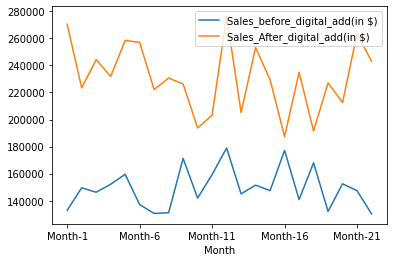

In [8]:
df.plot(x="Month", y=["Sales_before_digital_add(in $)", "Sales_After_digital_add(in $)"])
plt.show()

In [12]:
tvalue ,pvalue = stats.ttest_ind(data["Sales_After_digital_add(in $)"],data["Sales_before_digital_add(in $)"])

In [13]:
tvalue

12.995084451110877

In [14]:
pvalue

2.614368006904645e-16

In [20]:
degree_of_fredom = len(data["Sales_After_digital_add(in $)"]) + len(data["Sales_before_digital_add(in $)"]) -2
degree_of_fredom

42

In [21]:
tcritical = stats.t.ppf(1-0.05 ,42)
tcritical

1.6819523559426

In [22]:
if np.abs(tvalue) > tcritical:
  print("we can reject null hypothesis" )
else:
  print("we can reject Alternate hypothesis")

we can reject null hypothesis


# The company needs to check whether there is any dependency between the features “Region” and “Manager”

In [23]:
data["Region"].value_counts()

Region - A    10
Region - B     7
Region - C     5
Name: Region, dtype: int64

In [24]:
data["Manager"].value_counts()

Manager - A    9
Manager - B    7
Manager - C    6
Name: Manager, dtype: int64

In [27]:
data_crosstab = pd.crosstab(data["Region"] ,data["Manager"] , margins = False)
data_crosstab

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [29]:
from scipy.stats import chi2_contingency

In [30]:
stat,p,dof,expected = chi2_contingency(data_crosstab)
p

0.5493991051158094

In [31]:
alpha = 0.05
if p<= alpha:
  print("Dependent(Reject Hypothesis) (accept Alternate hypothesis :There is significant dependency between features")
else:
  print("independenct(Accept Hypothesis) : There is no dependency between the features")

independenct(Accept Hypothesis) : There is no dependency between the features
